In [62]:
import numpy as np
import matplotlib.pyplot as plt

Dataset 1

In [63]:
np.random.seed(45)
num_samples = 40
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y1 = f_x + eps

Without momentum(vanilla descent)

In [64]:
X = np.vstack((np.ones(len(x1)), x1)).T
theta_star = np.linalg.inv(X.T @ X) @ (X.T @ y1)
theta0_star1, theta1_star1 = theta_star
print(f"True parameters: theta0 = {theta0_star1:.2f}, theta1 = {theta1_star1:.2f}")

epsilon = 0.001

def loss(x, y, theta0, theta1):
    return np.mean((y - (theta0 + theta1*x))**2)


def full_batch_gradient_descent(x, y, theta0, theta1, lr,theta0_star,theta1_star):
    n = len(y)
    steps = 0
    loss_history = []
    theta_path = []
    epochs = 0
    while True:
        y_pred = theta0 + theta1*x
        error = y - y_pred
        d_theta0 = (-2/n)*sum(error)
        d_theta1 = (-2/n)*sum(error*x)
        
        theta0 = theta0 - lr * d_theta0
        theta1 = theta1 - lr * d_theta1
        

        epochs += 1
        steps += 1
        loss_history.append(loss(x, y, theta0, theta1))
        theta_path.append((theta0, theta1))
        # dist = np.sqrt((theta0 - theta0_true)**2 + (theta1 - theta1_true)**2)
        # print(f"Epoch {epoch}: distance = {dist:.5f}")

        
        if np.sqrt((theta0 - theta0_star)**2 + (theta1 - theta1_star)**2) < epsilon:
            break
            
    return theta0,theta1,loss_history,steps,epochs,np.array(theta_path)

def stochastic_gradient_descent(x, y, theta0, theta1, lr,theta0_star,theta1_star):
    n = len(y)
    steps = 0
    loss_history = []
    theta_path = []
    epochs = 0

    while True:
        
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(n):
            y_pred = theta0 + theta1 * x_shuffled[i]
            error = y_shuffled[i] - y_pred
            d_theta0 = -2 * error
            d_theta1 = -2 * error * x_shuffled[i]

            theta0 = theta0 - lr * d_theta0
            theta1 = theta1 - lr * d_theta1
            steps += 1

        loss_history.append(loss(x, y, theta0, theta1))
        theta_path.append((theta0, theta1))
        epochs += 1
            # convergence check
        if np.sqrt((theta0 - theta0_star) ** 2 + (theta1 - theta1_star) ** 2) < epsilon:
            break
    return theta0, theta1, loss_history, steps,epochs,np.array(theta_path)



True parameters: theta0 = 3.95, theta1 = 2.68


Average steps and epochs

In [65]:
num_runs = 10
steps_fbgd_list = []
steps_sgd_list = []
epochs_fbgd_list = []
epochs_sgd_list = []

for _ in range(num_runs):
    np.random.seed(45 + _)
    theta0_init, theta1_init = 0, 0
    
    _, _, loss_fbgd, steps_fbgd,epochs_fbgd,_= full_batch_gradient_descent(x1, y1, theta0_init, theta1_init, 0.1,theta0_star1,theta1_star1)
    _, _, loss_sgd, steps_sgd,epochs_sgd,_ = stochastic_gradient_descent(x1, y1, theta0_init, theta1_init, 0.01,theta0_star1,theta1_star1)
    
    steps_fbgd_list.append(steps_fbgd)
    steps_sgd_list.append(steps_sgd)
    epochs_fbgd_list.append(epochs_fbgd)
    epochs_sgd_list.append(epochs_sgd)
   


avg_steps_fbgd = np.mean(steps_fbgd_list)
avg_steps_sgd = np.mean(steps_sgd_list)
avg_epochs_fbgd = np.mean(epochs_fbgd_list)
avg_epochs_sgd = np.mean(epochs_sgd_list)

print(f"Full Batch Gradient Descent converged in {avg_steps_fbgd:.2f} steps and {avg_epochs_fbgd:.2f} epochs")
print(f"Stochastic Gradient Descent converged in {avg_steps_sgd:.2f} steps and {avg_epochs_sgd:.2f} epochs")



Full Batch Gradient Descent converged in 128.00 steps and 128.00 epochs
Stochastic Gradient Descent converged in 11776.00 steps and 294.40 epochs


plot of loss vs epochs

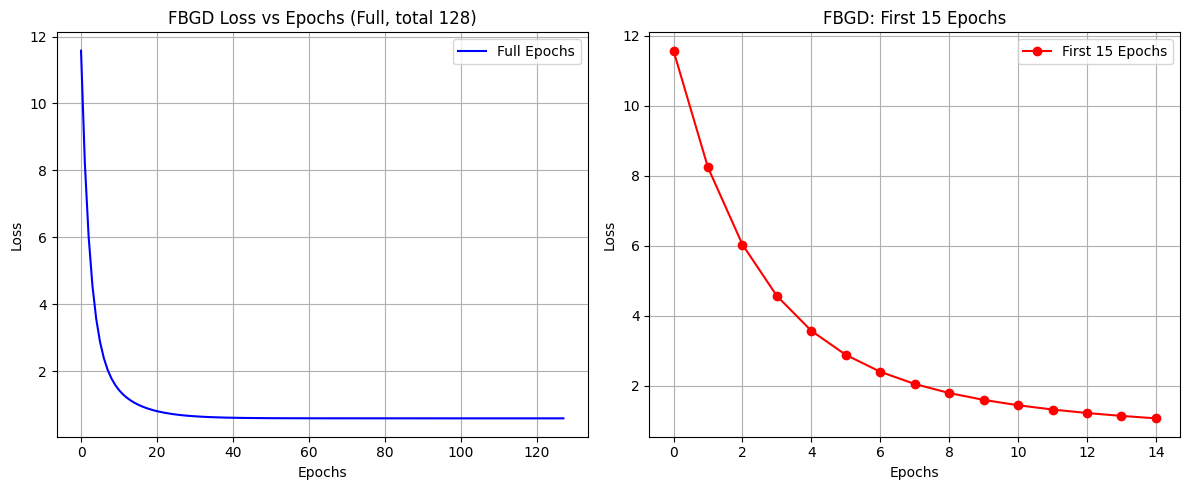

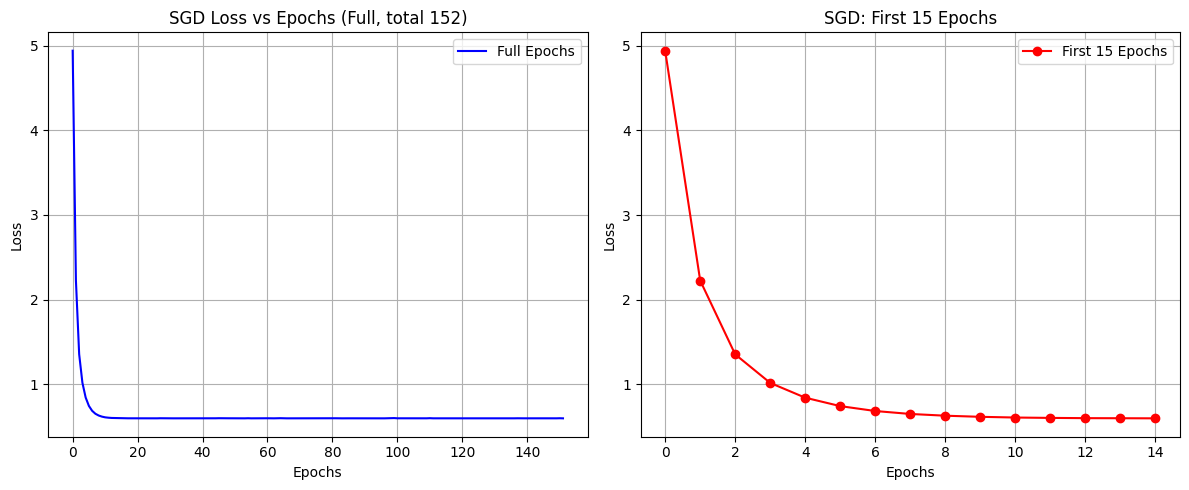

In [127]:
_, _, loss_fbgd, steps_fbgd,epochs_fbgd,path_fbgd= full_batch_gradient_descent(x1, y1, theta0_init, theta1_init, 0.1,theta0_star1,theta1_star1)
_, _, loss_sgd, steps_sgd,epochs_sgd,path_sgd = stochastic_gradient_descent(x1, y1, theta0_init, theta1_init, 0.01,theta0_star1,theta1_star1)

#FBGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_fbgd)), loss_fbgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"FBGD Loss vs Epochs (Full, total {epochs_fbgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_fbgd))), loss_fbgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("FBGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#SGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_sgd)), loss_sgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"SGD Loss vs Epochs (Full, total {epochs_sgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_sgd))), loss_sgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Contour plot

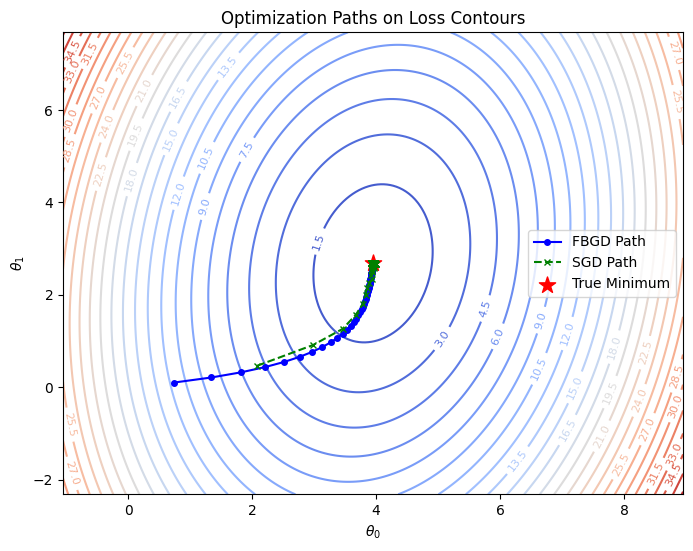

In [130]:
theta0_vals = np.linspace(theta0_star1 - 5, theta0_star1 + 5, 200)
theta1_vals = np.linspace(theta1_star1 - 5, theta1_star1 + 5, 200)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        Z[i, j] = loss(x1, y1, T0[i, j], T1[i, j])

plt.figure(figsize=(8, 6))
CS = plt.contour(T0, T1, Z, levels=30, cmap="coolwarm")
plt.clabel(CS, inline=True, fontsize=8)

# Plot optimization paths
plt.plot(path_fbgd[:, 0], path_fbgd[:, 1], "o-", color="blue", label="FBGD Path", markersize=4)
plt.plot(path_sgd[:, 0], path_sgd[:, 1], "x--", color="green", label="SGD Path", markersize=4)
plt.scatter(theta0_star1, theta1_star1, color="red", marker="*", s=150, label="True Minimum")

plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Optimization Paths on Loss Contours")
plt.legend()
plt.show()

Dataset 2

In [131]:
num_samples = 40
np.random.seed(45) 
    
# Generate data
x2 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x2 + 1
eps = np.random.randn(num_samples)
y2 = f_x + eps

In [132]:
X = np.vstack((np.ones(len(x2)), x2)).T
theta_star = np.linalg.inv(X.T @ X) @ (X.T @ y2)
theta0_star2, theta1_star2 = theta_star
print(f"True parameters: theta0 = {theta0_star2:.2f}, theta1 = {theta1_star2:.2f}")


True parameters: theta0 = 0.95, theta1 = 99.98


Average steps and epochs

In [143]:
num_runs = 10
steps_fbgd_list = []
steps_sgd_list = []
epochs_fbgd_list = []
epochs_sgd_list = []

for _ in range(num_runs):
    # np.random.seed(45 + i)
    theta0_init, theta1_init = 0, 0
    
    _, _, loss_fbgd, steps_fbgd,epochs_fbgd,_= full_batch_gradient_descent(x2, y2, theta0_init, theta1_init, 0.001, theta0_star2, theta1_star2)
    _, _, loss_sgd, steps_sgd,epochs_sgd,_ = stochastic_gradient_descent(x2, y2, theta0_init, theta1_init, 1e-4 , theta0_star2, theta1_star2)
    
    steps_fbgd_list.append(steps_fbgd)
    steps_sgd_list.append(steps_sgd)
    epochs_fbgd_list.append(epochs_fbgd)
    epochs_sgd_list.append(epochs_sgd)
   


avg_steps_fbgd = np.mean(steps_fbgd_list)
avg_steps_sgd = np.mean(steps_sgd_list)
avg_epochs_fbgd = np.mean(epochs_fbgd_list)
avg_epochs_sgd = np.mean(epochs_sgd_list)

print(f"Full Batch Gradient Descent converged in {avg_steps_fbgd:.2f} steps and {avg_epochs_fbgd:.2f} epochs")
print(f"Stochastic Gradient Descent converged in {avg_steps_sgd:.2f} steps and {avg_epochs_sgd:.2f} epochs")



Full Batch Gradient Descent converged in 3958.00 steps and 3958.00 epochs
Stochastic Gradient Descent converged in 36324.00 steps and 908.10 epochs


plot of loss vs epochs

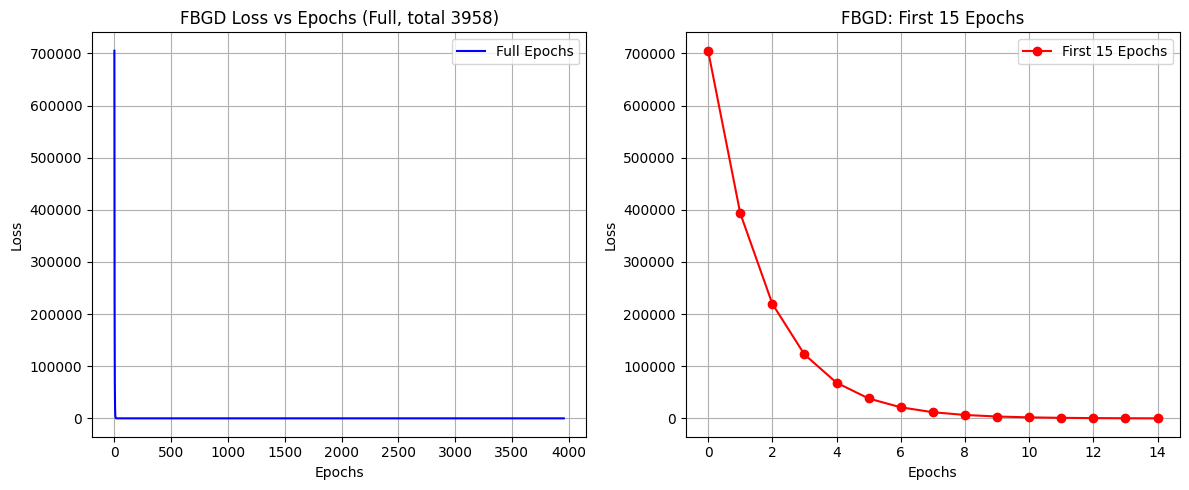

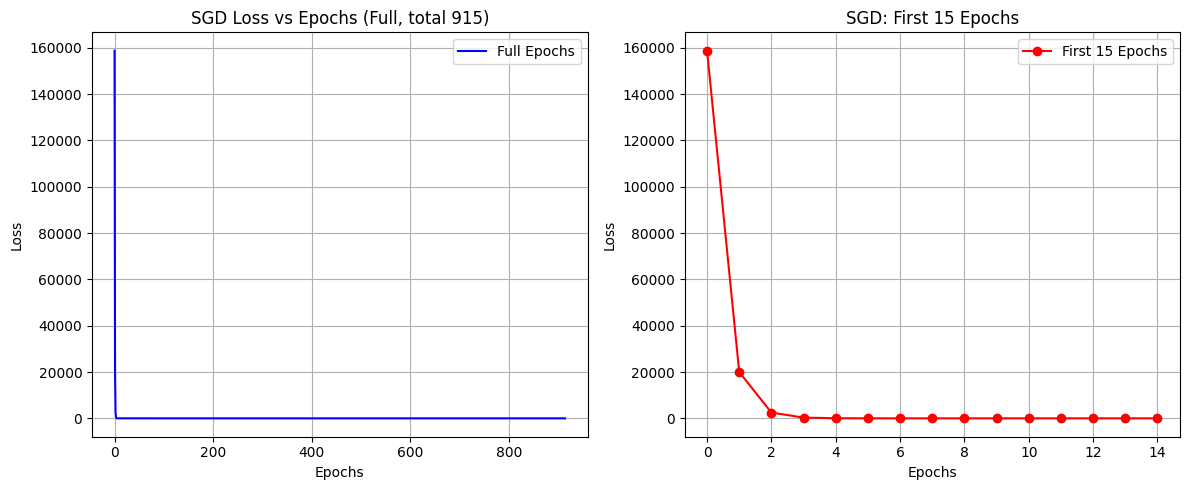

In [144]:
_, _, loss_fbgd, steps_fbgd,epochs_fbgd,path_fbgd= full_batch_gradient_descent(x2, y2, theta0_init, theta1_init, 0.001,theta0_star2,theta1_star2)
_, _, loss_sgd, steps_sgd,epochs_sgd,path_sgd = stochastic_gradient_descent(x2, y2, theta0_init, theta1_init, 1e-4,theta0_star2,theta1_star2)

#FBGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_fbgd)), loss_fbgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"FBGD Loss vs Epochs (Full, total {epochs_fbgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_fbgd))), loss_fbgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("FBGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#SGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_sgd)), loss_sgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"SGD Loss vs Epochs (Full, total {epochs_sgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_sgd))), loss_sgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



contour plots

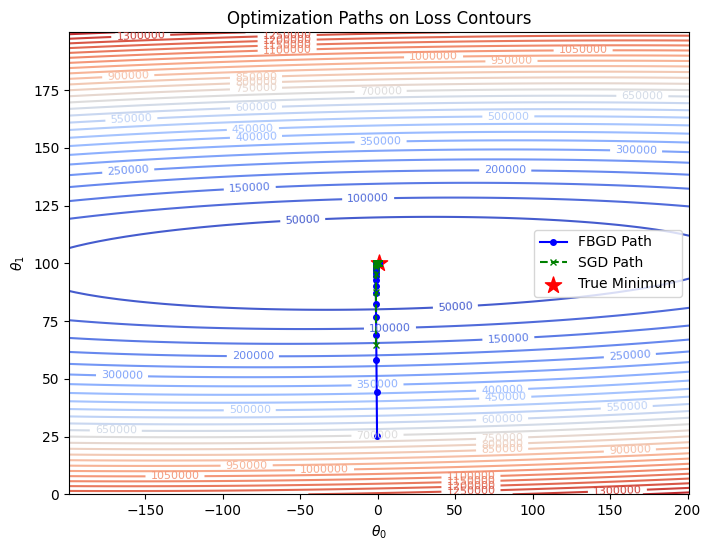

In [146]:
theta0_vals = np.linspace(theta0_star2 - 200, theta0_star2 + 200, 200)
theta1_vals = np.linspace(theta1_star2 - 100, theta1_star2 + 100, 200)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        Z[i, j] = loss(x2, y2, T0[i, j], T1[i, j])

plt.figure(figsize=(8, 6))
CS = plt.contour(T0, T1, Z, levels=30, cmap="coolwarm")
plt.clabel(CS, inline=True, fontsize=8)

# Plot optimization paths
plt.plot(path_fbgd[:, 0], path_fbgd[:, 1], "o-", color="blue", label="FBGD Path", markersize=4)
plt.plot(path_sgd[:, 0], path_sgd[:, 1], "x--", color="green", label="SGD Path", markersize=4)
plt.scatter(theta0_star2, theta1_star2, color="red", marker="*", s=150, label="True Minimum")

plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Optimization Paths on Loss Contours")
plt.legend()
plt.show()

with momentum

In [85]:
beta = 0.77
epsilon = 0.001
def fbgd_with_momentum(x, y, theta0, theta1, lr, beta, theta0_star, theta1_star):
    n = len(y)
    steps = 0
    loss_history = []
    theta_path = []
    momentum_path = []
    momentum0, momentum1 = 0, 0  # initial momentum
    epochs = 0
    while True:
        # Compute gradient
        y_pred = theta0 + theta1 * x
        error = y - y_pred
        d_theta0 = (-2/n) * np.sum(error)
        d_theta1 = (-2/n) * np.sum(error * x)

        # Update momentum
        momentum0 = beta * momentum0 + (1 - beta) * d_theta0
        momentum1 = beta * momentum1 + (1 - beta) * d_theta1

        # Update parameters
        theta0 -= lr * momentum0
        theta1 -= lr * momentum1

        loss_history.append(loss(x, y, theta0, theta1))
        theta_path.append((theta0, theta1))
        momentum_path.append((momentum0, momentum1))
        steps += 1
        epochs += 1
        # Convergence check
        if np.sqrt((theta0 - theta0_star)**2 + (theta1 - theta1_star)**2) < epsilon:
            break
        

    return theta0, theta1, loss_history, steps,epochs, np.array(theta_path),np.array(momentum_path)


In [86]:
def sgd_with_momentum(x, y, theta0, theta1, lr, beta, theta0_star, theta1_star):
    n = len(y)
    steps = 0
    loss_history = []
    theta_path = []
    momentum0, momentum1 = 0, 0
    epochs = 0
    momentum_path = []
    while True:
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled, y_shuffled = x[indices], y[indices]

        for i in range(n):
            y_pred = theta0 + theta1 * x_shuffled[i]
            error = y_shuffled[i] - y_pred
            d_theta0 = -2 * error
            d_theta1 = -2 * error * x_shuffled[i]

            momentum0 = beta * momentum0 + (1 - beta) * d_theta0
            momentum1 = beta * momentum1 + (1 - beta) * d_theta1

            theta0 -= lr * momentum0
            theta1 -= lr * momentum1
            steps += 1

        loss_history.append(loss(x, y, theta0, theta1))
        momentum_path.append((momentum0, momentum1))
        theta_path.append((theta0, theta1))
        epochs += 1

        if np.sqrt((theta0 - theta0_star)**2 + (theta1 - theta1_star)**2) < epsilon:
            break


    return theta0, theta1, loss_history, steps,epochs, np.array(theta_path),np.array(momentum_path)


Dataset 1

Average steps and epochs

In [ ]:
beta = 0.8
num_runs = 10
steps_fbgd_list = []
steps_sgd_list = []
epochs_fbgd_list = []
epochs_sgd_list = []

for i in range(num_runs):
    np.random.seed(45 + i)
    theta0_init, theta1_init = 0, 0
    
    _, _, loss_fbgd, steps_fbgd,epochs_fbgd,_,_= fbgd_with_momentum(x1, y1, theta0_init, theta1_init, 0.1, beta,theta0_star1, theta1_star1)
    _, _, loss_sgd, steps_sgd,epochs_sgd,_,_ = sgd_with_momentum(x1, y1, theta0_init, theta1_init, 0.01 ,beta, theta0_star1, theta1_star1)
    
    steps_fbgd_list.append(steps_fbgd)
    steps_sgd_list.append(steps_sgd)
    epochs_fbgd_list.append(epochs_fbgd)
    epochs_sgd_list.append(epochs_sgd)
   


avg_steps_fbgd = np.mean(steps_fbgd_list)
avg_steps_sgd = np.mean(steps_sgd_list)
avg_epochs_fbgd = np.mean(epochs_fbgd_list)
avg_epochs_sgd = np.mean(epochs_sgd_list)

print(f"FBGD with momentum converged in {avg_steps_fbgd:.2f} steps and {avg_epochs_fbgd:.2f} epochs")
print(f"SGD with momentum converged in {avg_steps_sgd:.2f} steps and {avg_epochs_sgd:.2f} epochs")


FBGD with momentum converged in 75.00 steps and 75.00 epochs
SGD with momentum converged in 7880.00 steps and 197.00 epochs


plot of loss vs epochs

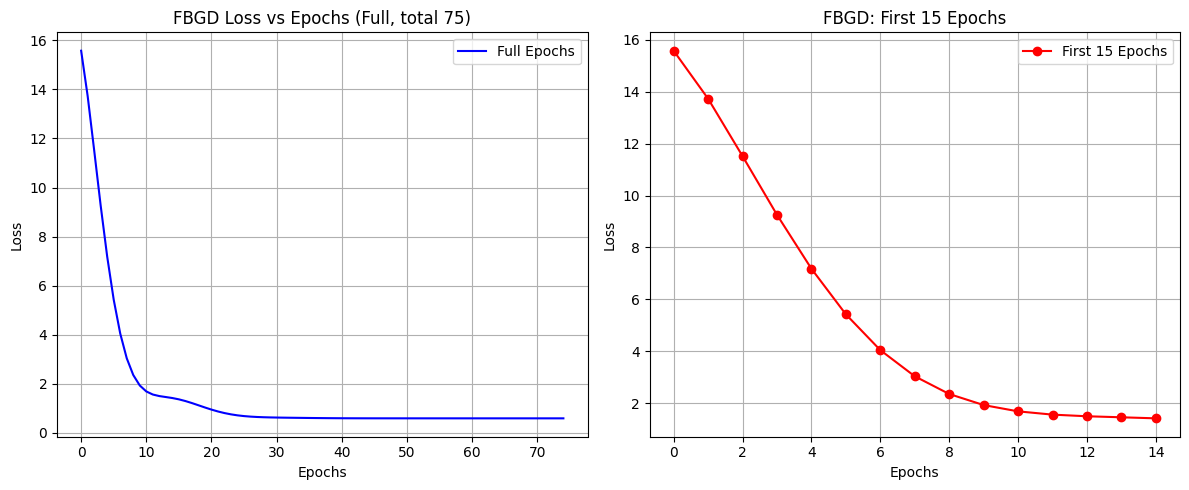

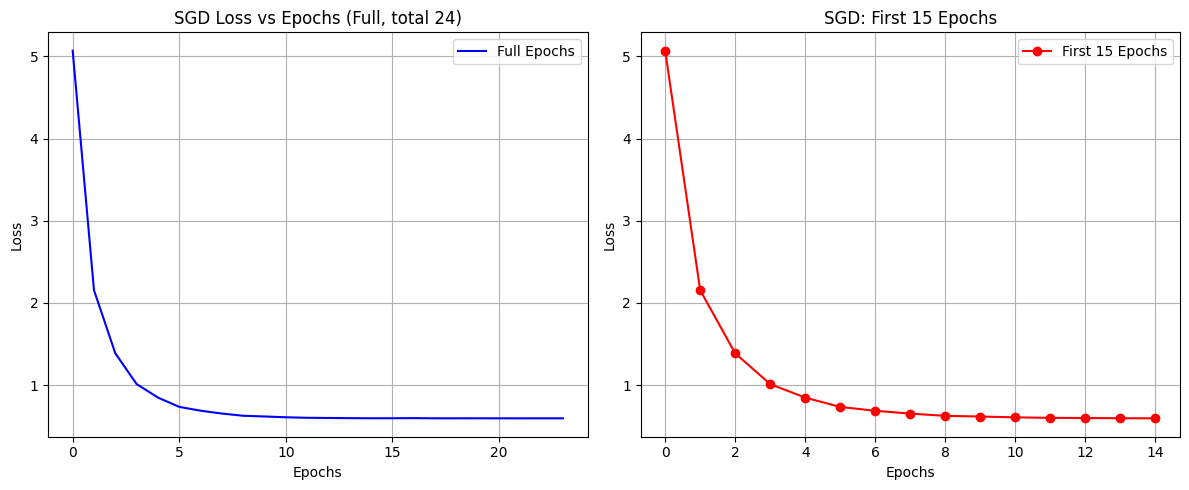

In [151]:
theta0_init, theta1_init = 0, 0
    
_, _, loss_fbgd, steps_fbgd,epochs_fbgd,path_fbgd,path_momentum_fbgd= fbgd_with_momentum(x1, y1, theta0_init, theta1_init, 0.1, beta,theta0_star1, theta1_star1)
_, _, loss_sgd, steps_sgd,epochs_sgd,path_sgd,path_momentum_sgd = sgd_with_momentum(x1, y1, theta0_init, theta1_init, 0.01 ,beta, theta0_star1, theta1_star1)
    

#FBGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_fbgd)), loss_fbgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"FBGD Loss vs Epochs (Full, total {epochs_fbgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_fbgd))), loss_fbgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("FBGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#SGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_sgd)), loss_sgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"SGD Loss vs Epochs (Full, total {epochs_sgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_sgd))), loss_sgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




contour plot of full batch gradient descent with different epochs

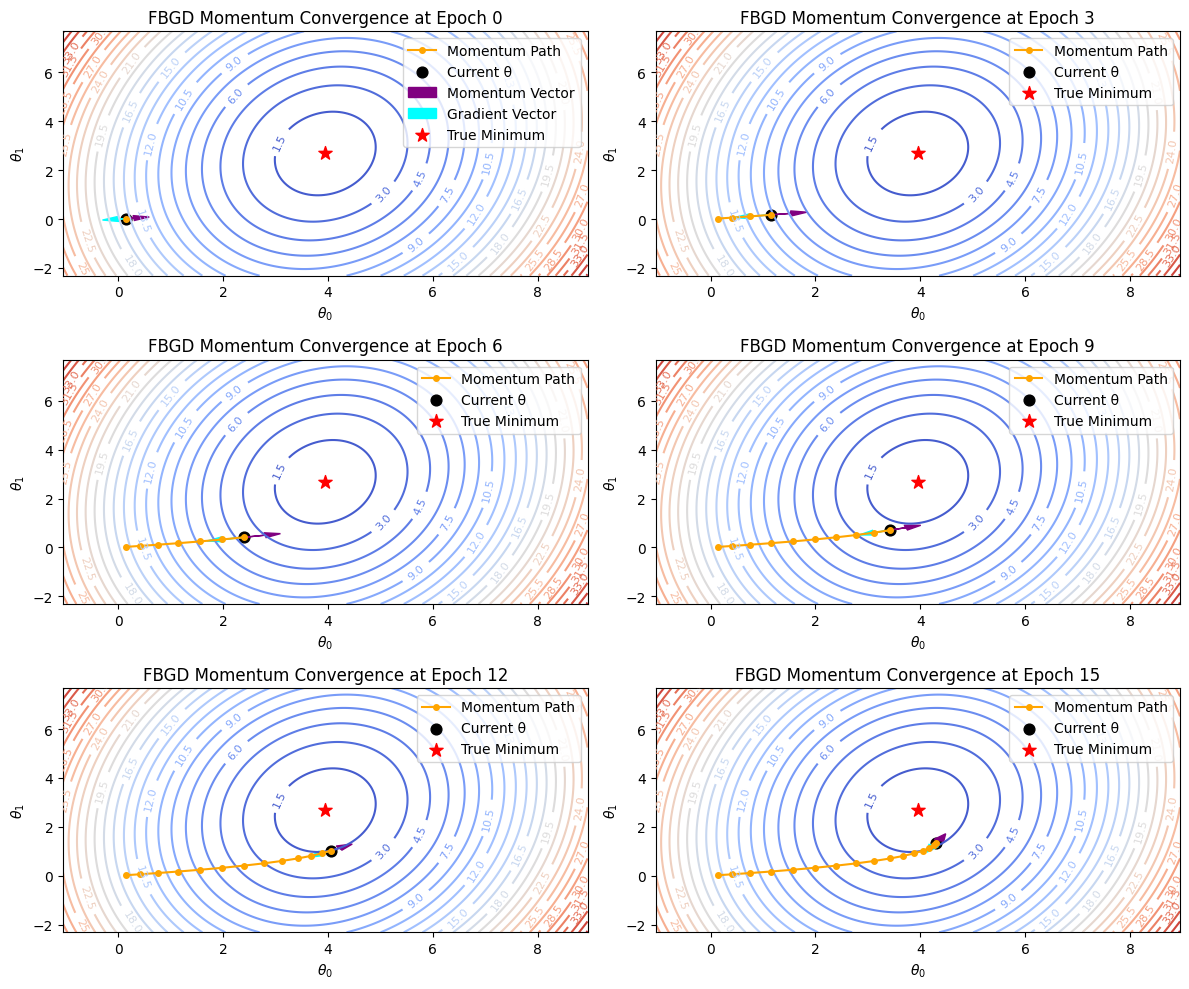

In [ ]:
theta0_vals = np.linspace(theta0_star1 - 5, theta0_star1 + 5, 200)
theta1_vals = np.linspace(theta1_star1 - 5, theta1_star1 + 5, 200)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        Z[i, j] = loss(x1, y1, T0[i, j], T1[i, j])


epochs_to_plot = [0, 3, 6, 9, 12, 15]
plt.figure(figsize=(12, 10))

for idx, e in enumerate(epochs_to_plot, 1):
    plt.subplot(3, 2, idx)
    CS = plt.contour(T0, T1, Z, levels=30, cmap="coolwarm")
    plt.clabel(CS, inline=True, fontsize=8)

    plt.plot(path_fbgd[:e+1, 0], path_fbgd[:e+1, 1], "o-", color="orange", label="Momentum Path", markersize=4)

    # Current theta
    if e < len(path_fbgd):
        theta0_curr, theta1_curr = path_fbgd[e]
        plt.scatter(theta0_curr, theta1_curr, color="black", s=60, label="Current θ")

        # Momentum vector
        if e < len(path_momentum_fbgd):
            m0, m1 = path_momentum_fbgd[e]
            plt.arrow(theta0_curr, theta1_curr,
                      -m0 * 0.1, -m1 * 0.1,  # scaled for visibility
                      head_width=0.2, color="purple", label="Momentum Vector" if e == 0 else None)

            # Gradient vector (approx. negative of momentum before weighting)
            plt.arrow(theta0_curr, theta1_curr,
                      m0 * 0.1, m1 * 0.1,
                      head_width=0.2, color="cyan", label="Gradient Vector" if e == 0 else None)

    # True minimum
    plt.scatter(theta0_star1, theta1_star1, color="red", marker="*", s=100, label="True Minimum")

    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")
    plt.title(f"FBGD Momentum Convergence at Epoch {e}")
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


contour plot of stochastic gradient descent with different epochs

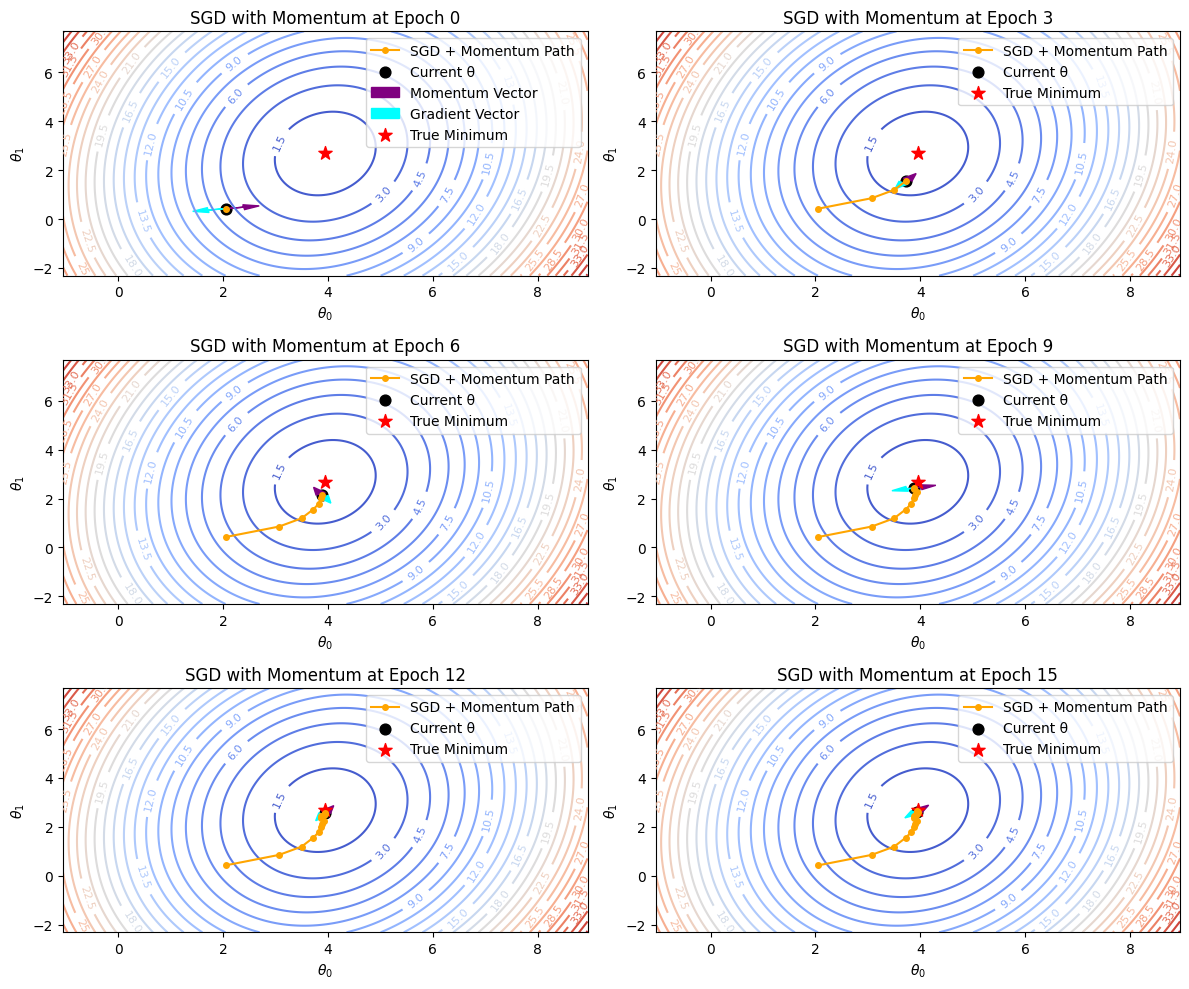

In [ ]:
theta0_vals = np.linspace(theta0_star1 - 5, theta0_star1 + 5, 200)
theta1_vals = np.linspace(theta1_star1 - 5, theta1_star1 + 5, 200)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        Z[i, j] = loss(x1, y1, T0[i, j], T1[i, j])

epochs_to_plot = [0, 3, 6, 9, 12, 15]
plt.figure(figsize=(12, 10))

for idx, e in enumerate(epochs_to_plot, 1):
    plt.subplot(3, 2, idx)
    CS = plt.contour(T0, T1, Z, levels=30, cmap="coolwarm")
    plt.clabel(CS, inline=True, fontsize=8)

    plt.plot(path_sgd[:e+1, 0], path_sgd[:e+1, 1], "o-", color="orange", label="SGD + Momentum Path", markersize=4)

    # Current theta
    if e < len(path_sgd):
        theta0_curr, theta1_curr = path_sgd[e]
        plt.scatter(theta0_curr, theta1_curr, color="black", s=60, label="Current θ")

        # Momentum vector
        if e < len(path_momentum_sgd):
            m0, m1 = path_momentum_sgd[e]
            plt.arrow(theta0_curr, theta1_curr,
                      -m0 * 0.1, -m1 * 0.1, 
                      head_width=0.2, color="purple", label="Momentum Vector" if e == 0 else None)

            # Gradient direction
            plt.arrow(theta0_curr, theta1_curr,
                      m0 * 0.1, m1 * 0.1,
                      head_width=0.2, color="cyan", label="Gradient Vector" if e == 0 else None)

    # True minimum
    plt.scatter(theta0_star1, theta1_star1, color="red", marker="*", s=100, label="True Minimum")

    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")
    plt.title(f"SGD with Momentum at Epoch {e}")
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


dataset 2

In [ ]:
num_runs = 10
steps_fbgd_list = []
steps_sgd_list = []
epochs_fbgd_list = []
epochs_sgd_list = []

beta = 0.7
for i in range(num_runs):
    np.random.seed(45 + i)
    theta0_init, theta1_init = 0, 0
    
    _, _, loss_fbgd, steps_fbgd,epochs_fbgd,_,_= fbgd_with_momentum(x2, y2, theta0_init, theta1_init, 0.001, beta,theta0_star2, theta1_star2)
    _, _, loss_sgd, steps_sgd,epochs_sgd,_,_ = sgd_with_momentum(x2, y2, theta0_init, theta1_init, 0.0001,beta, theta0_star2, theta1_star2)
    
    steps_fbgd_list.append(steps_fbgd)
    steps_sgd_list.append(steps_sgd)
    epochs_fbgd_list.append(epochs_fbgd)
    epochs_sgd_list.append(epochs_sgd)
   


avg_steps_fbgd = np.mean(steps_fbgd_list)
avg_steps_sgd = np.mean(steps_sgd_list)
avg_epochs_fbgd = np.mean(epochs_fbgd_list)
avg_epochs_sgd = np.mean(epochs_sgd_list)

print(f"FBGD with momentum converged in {avg_steps_fbgd:.2f} steps and {avg_epochs_fbgd:.2f} epochs")
print(f"SGD with momentum converged in {avg_steps_sgd:.2f} steps and {avg_epochs_sgd:.2f} epochs")


FBGD with momentum converged in 3942.00 steps and 3942.00 epochs
SGD with momentum converged in 35584.00 steps and 889.60 epochs


Average steps and epochs

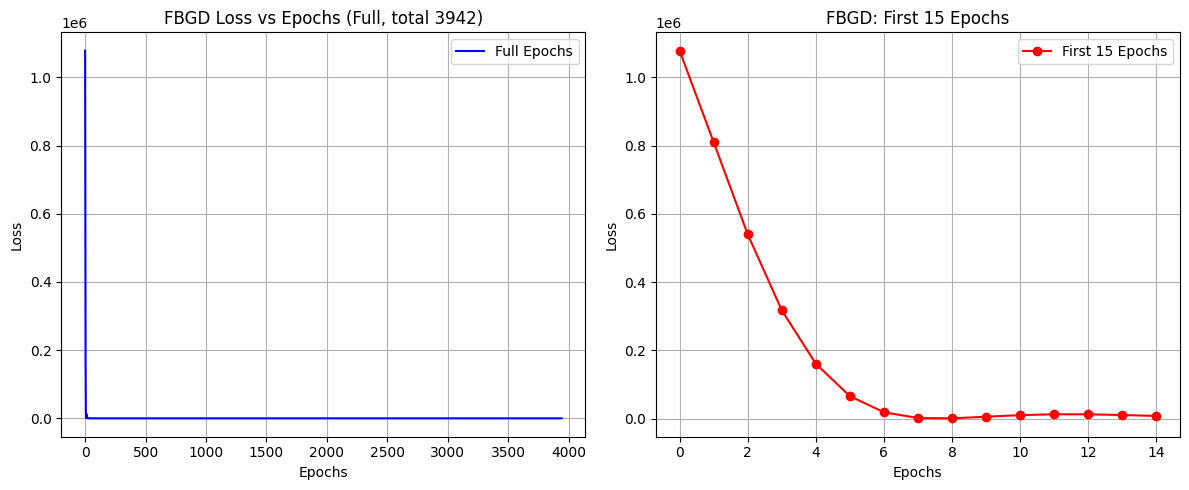

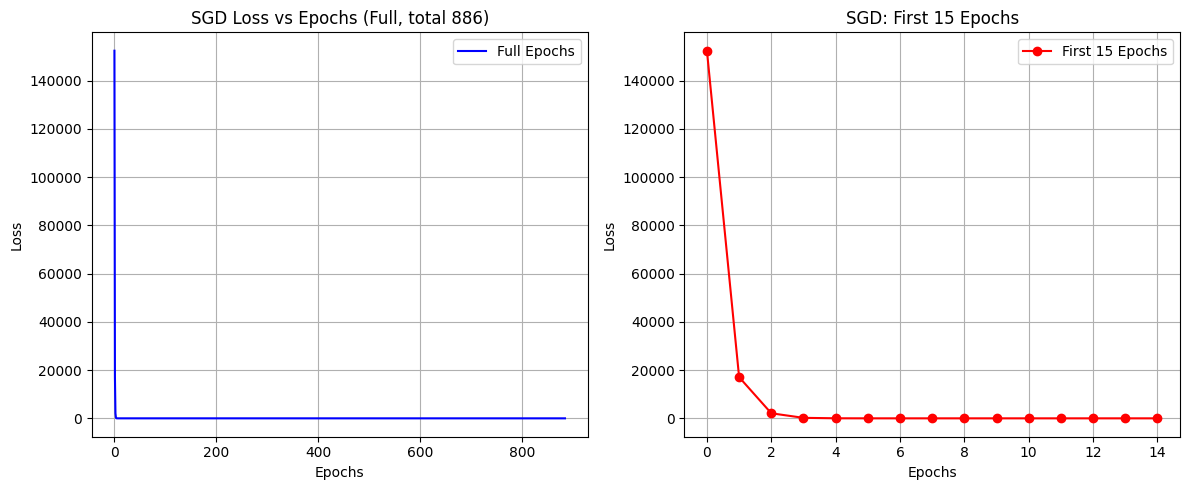

In [193]:
theta0_init, theta1_init = 0, 0
    
_, _, loss_fbgd, steps_fbgd,epochs_fbgd,path_fbgd,path_momentum_fbgd= fbgd_with_momentum(x2, y2, theta0_init, theta1_init, 0.001, beta,theta0_star2, theta1_star2)
_, _, loss_sgd, steps_sgd,epochs_sgd,path_sgd,path_momentum_sgd = sgd_with_momentum(x2, y2, theta0_init, theta1_init, 0.0001 ,beta, theta0_star2, theta1_star2)


#FBGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_fbgd)), loss_fbgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"FBGD Loss vs Epochs (Full, total {epochs_fbgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_fbgd))), loss_fbgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("FBGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#SGD Plots
plt.figure(figsize=(12,5))

#loss curve
plt.subplot(1,2,1)
plt.plot(range(len(loss_sgd)), loss_sgd, 'b-', label='Full Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"SGD Loss vs Epochs (Full, total {epochs_sgd})")
plt.legend()
plt.grid(True)

#First 15 epochs
plt.subplot(1,2,2)
plt.plot(range(min(15, len(loss_sgd))), loss_sgd[:15], 'r-o', label='First 15 Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD: First 15 Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




contour plot of full batch gradient descent with different epochs

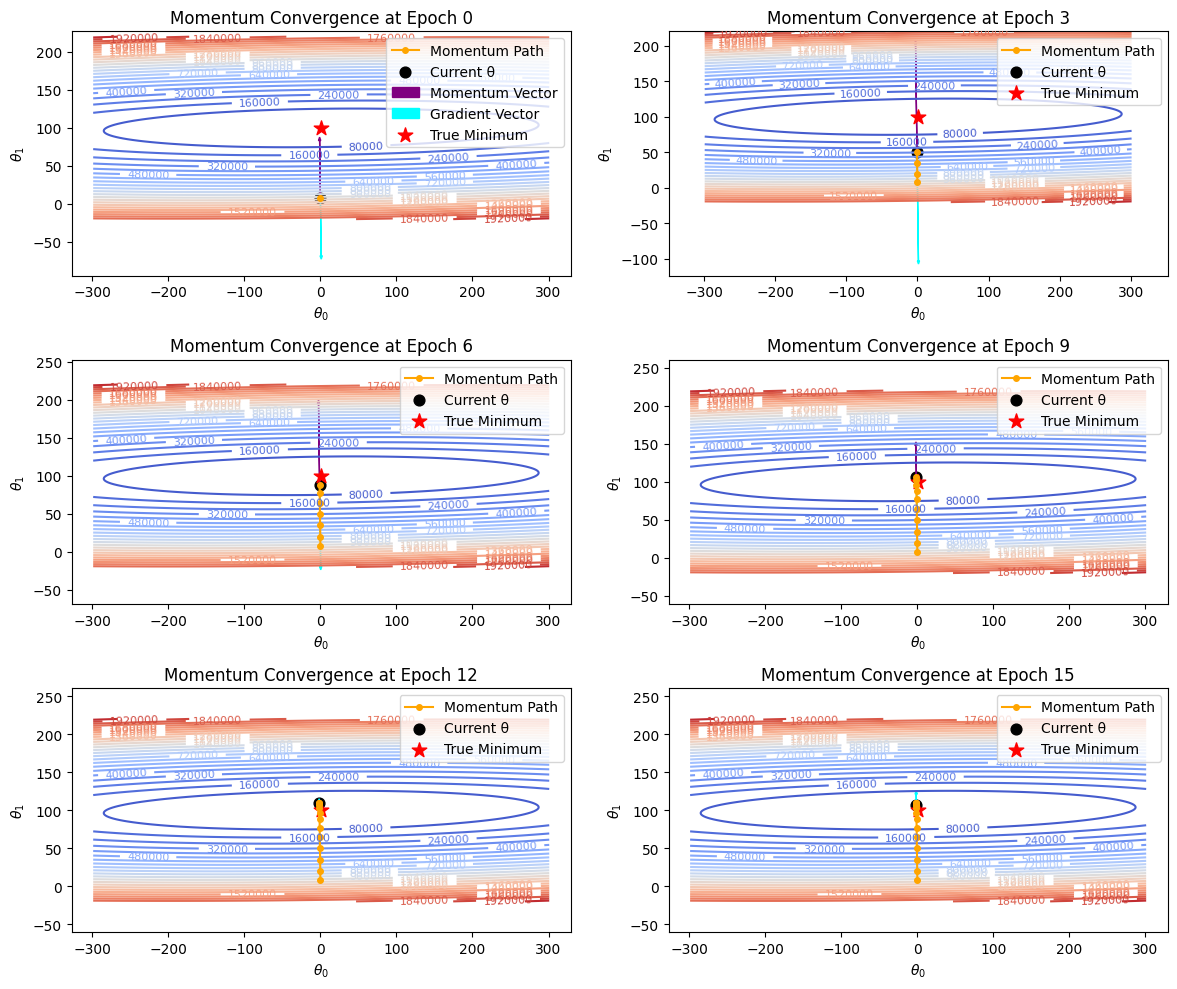

In [ ]:
theta0_vals = np.linspace(theta0_star2 - 300, theta0_star2 + 300, 250)
theta1_vals = np.linspace(theta1_star2 - 120, theta1_star2 + 120, 250)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        Z[i, j] = loss(x2, y2, T0[i, j], T1[i, j])

epochs_to_plot = [0, 3, 6, 9, 12, 15]
plt.figure(figsize=(12, 10))

for idx, e in enumerate(epochs_to_plot, 1):
    plt.subplot(3, 2, idx)

    CS = plt.contour(T0, T1, Z, levels=30, cmap="coolwarm")
    plt.clabel(CS, inline=True, fontsize=8)

    plt.plot(path_fbgd[:e+1, 0], path_fbgd[:e+1, 1],
             "o-", color="orange", label="Momentum Path", markersize=4)

    # Current θ
    if e < len(path_fbgd):
        θ0, θ1 = path_fbgd[e]
        plt.scatter(θ0, θ1, color="black", s=60, label="Current θ")

        # Momentum and gradient vectors
        if e < len(path_momentum_fbgd):
            m0, m1 = path_momentum_fbgd[e]
            scale = 0.01  
            plt.arrow(θ0, θ1, -m0*scale, -m1*scale,
                      head_width=3, color="purple",
                      label="Momentum Vector" if e == 0 else None)
            plt.arrow(θ0, θ1, m0*scale, m1*scale,
                      head_width=3, color="cyan",
                      label="Gradient Vector" if e == 0 else None)

    # True minimum
    plt.scatter(theta0_star2, theta1_star2, color="red",
                marker="*", s=120, label="True Minimum")

    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")
    plt.title(f"Momentum Convergence at Epoch {e}")
    plt.legend(loc="upper right")
    plt.axis("equal") 

plt.tight_layout()
plt.show()


contour plot of stochastic gradient descent with different epochs

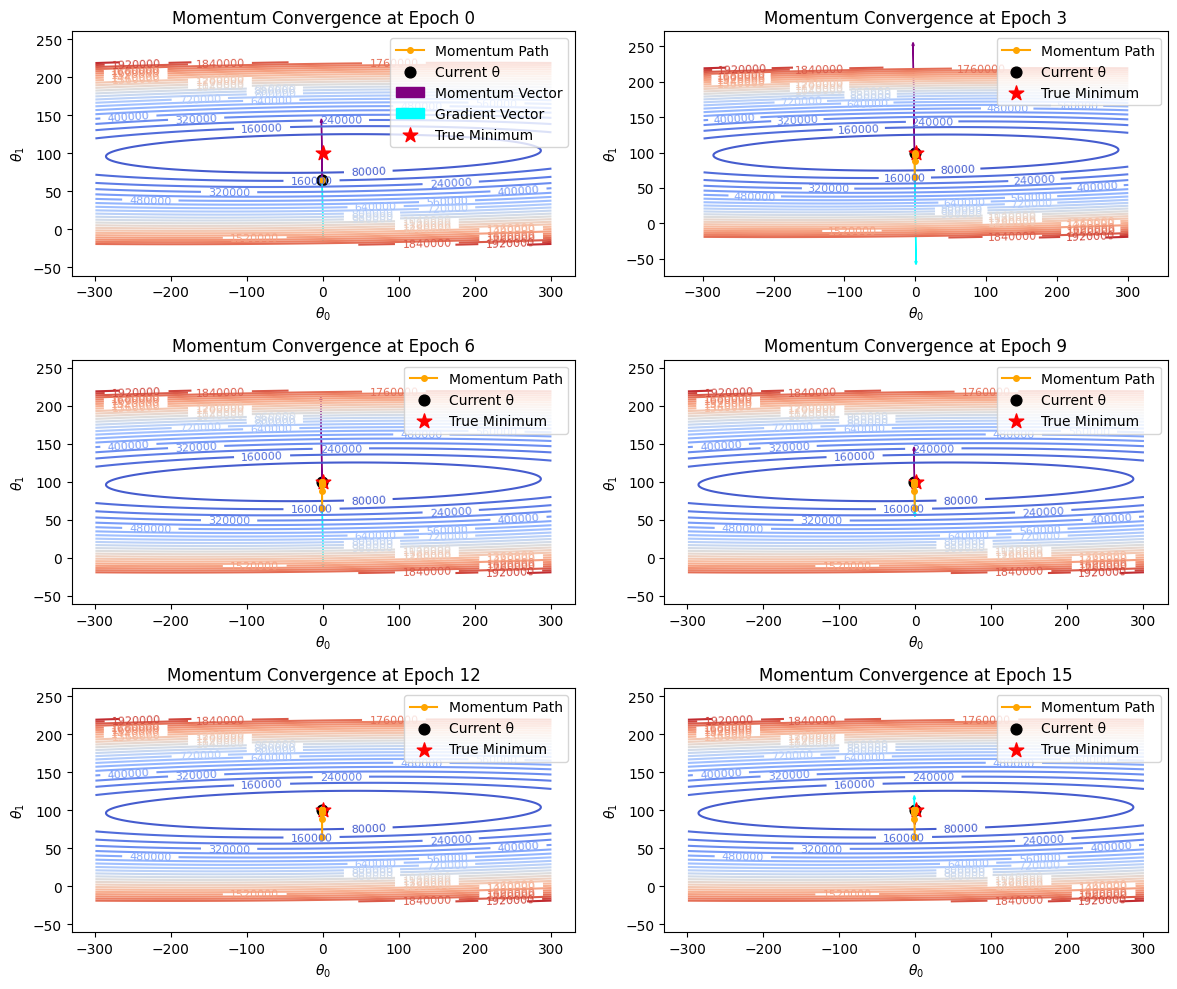

In [ ]:
theta0_vals = np.linspace(theta0_star2 - 300, theta0_star2 + 300, 250)
theta1_vals = np.linspace(theta1_star2 - 120, theta1_star2 + 120, 250)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        Z[i, j] = loss(x2, y2, T0[i, j], T1[i, j])

epochs_to_plot = [0, 3, 6, 9, 12, 15]
plt.figure(figsize=(12, 10))

for idx, e in enumerate(epochs_to_plot, 1):
    
    plt.subplot(3, 2, idx)

    CS = plt.contour(T0, T1, Z, levels=30, cmap="coolwarm")
    plt.clabel(CS, inline=True, fontsize=8)

    
    plt.plot(path_sgd[:e+1, 0], path_sgd[:e+1, 1],
             "o-", color="orange", label="Momentum Path", markersize=4)

    # Current θ
    if e < len(path_fbgd):
        θ0, θ1 = path_sgd[e]
        plt.scatter(θ0, θ1, color="black", s=60, label="Current θ")

        # Momentum and gradient vectors
        if e < len(path_momentum_fbgd):
            m0, m1 = path_momentum_fbgd[e]
            scale = 0.01 
            plt.arrow(θ0, θ1, -m0*scale, -m1*scale,
                      head_width=3, color="purple",
                      label="Momentum Vector" if e == 0 else None)
            plt.arrow(θ0, θ1, m0*scale, m1*scale,
                      head_width=3, color="cyan",
                      label="Gradient Vector" if e == 0 else None)

    # True minimum
    plt.scatter(theta0_star2, theta1_star2, color="red",
                marker="*", s=120, label="True Minimum")

    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")
    plt.title(f"Momentum Convergence at Epoch {e}")
    plt.legend(loc="upper right")
    plt.axis("equal") 

plt.tight_layout()
plt.show()
